In [1]:
import pandas as pd
import numpy as np

# Generating mock data
np.random.seed(42)

data = pd.DataFrame({
    'sensor_1': np.random.normal(0, 1, 1000),
    'sensor_2': np.random.normal(0, 1, 1000),
    'sensor_3': np.random.normal(0, 1, 1000),
    'operational_hours': np.random.randint(100, 5000, 1000),
    'maintenance': np.random.choice([0, 1], 1000, p=[0.95, 0.05])
})

# Simulating remaining useful life (RUL) based on operational hours and sensor readings
data['RUL'] = 5000 - data['operational_hours'] - (data['sensor_1'] + data['sensor_2'] + data['sensor_3']).cumsum()

# Save to CSV
data.to_csv('machinery_data.csv', index=False)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('machinery_data.csv')

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Feature selection
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

# Normalize features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Split data for regression and classification
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data[features], data[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(data[features], data[target_maintenance], test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train regression model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse_reg}")


Regression Model MSE: 1103.2844396957576


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train classification model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Model Accuracy: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))


Classification Model Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


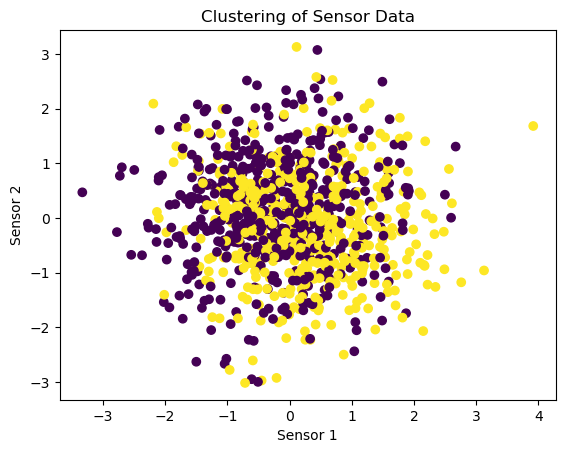

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Train clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Visualize clustering results
plt.scatter(data['sensor_1'], data['sensor_2'], c=data['cluster'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering of Sensor Data')
plt.show()


In [7]:
def predict_maintenance(features):
    # Predict RUL
    rul_pred = reg_model.predict([features])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features])
    
    # Predict cluster (anomaly detection)
    cluster_pred = kmeans.predict([features])
    
    return {
        'RUL Prediction': rul_pred[0],
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

# Example prediction
sample_features = [0.1, 0.2, 0.3, 1000]
prediction = predict_maintenance(sample_features)
print(prediction)


{'RUL Prediction': -2.678206262696707, 'Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Anomaly'}


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
data = pd.read_csv("machinery_data.csv")
data.head()

,sensor_1,sensor_2,sensor_3,operational_hours,maintenance,RUL
0,0.496714,1.399355,-0.675178,831,0,4167.779109
1,-0.138264,0.924634,-0.144519,4061,0,937.137258
2,0.647689,0.059630,-0.792420,4801,0,197.222359
3,1.523030,-0.646937,-0.307962,2604,0,2393.654227
4,-0.234153,0.698223,-1.893615,714,0,4285.083772


In [2]:
data.shape


(1000, 6)

In [3]:
df = data.copy()
df = df.reset_index(drop=True)

In [4]:
sensor_cols = ['sensor_1', 'sensor_2', 'sensor_3']


In [5]:
windows = [2, 3]


In [6]:
for w in windows:
    for col in sensor_cols:
        df[f'{col}_roll_mean_{w}'] = df[col].rolling(w, min_periods=1).mean()
        df[f'{col}_roll_std_{w}'] = df[col].rolling(w, min_periods=1).std()
        df[f'{col}_ema_{w}'] = df[col].ewm(span=w, adjust=False).mean()



In [7]:
for col in sensor_cols:
    df[f'{col}_lag_1'] = df[col].shift(1)


In [8]:
df.dropna(inplace=True)
df.shape

(999, 27)

In [9]:
target = 'maintenance'

feature_cols = [c for c in df.columns if c not in ['maintenance', 'RUL']]
X = df[feature_cols]
y = df[target]

print("Total features:", len(feature_cols))


Total features: 25


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)



In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
        class_weight='balanced',
        max_iter=3000,
        random_state=42
    ))
])

baseline_pipeline.fit(X_train, y_train)

y_prob_baseline = baseline_pipeline.predict_proba(X_test)[:, 1]
baseline_pr_auc = average_precision_score(y_test, y_prob_baseline)

print("Baseline Logistic Regression PR-AUC:", baseline_pr_auc)


Baseline Logistic Regression PR-AUC: 0.0752795317426247


In [13]:
!pip install -q xgboost


In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score

In [15]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='aucpr',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
xgb_pr_auc = average_precision_score(y_test, y_prob_xgb)

print("XGBoost PR-AUC:", xgb_pr_auc)


XGBoost PR-AUC: 0.06221174010656133


In [16]:
window_sizes = [6, 12]
sensor_cols = ['sensor_1', 'sensor_2', 'sensor_3']

for col in sensor_cols:
    for w in window_sizes:
        df[f'{col}_roll_mean_{w}'] = df[col].rolling(w).mean()
        df[f'{col}_roll_std_{w}'] = df[col].rolling(w).std()
        df[f'{col}_ema_{w}'] = df[col].ewm(span=w).mean()
    df[f'{col}_lag_2'] = df[col].shift(2)

df.dropna(inplace=True)

In [17]:

target = 'maintenance'
feature_cols = [c for c in df.columns if c not in ['maintenance', 'RUL']]
X = df[feature_cols]
y = df[target]


In [18]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [19]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", y_train_res.value_counts())


After SMOTE: maintenance
0    744
1    744
Name: count, dtype: int64


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

lr = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    random_state=42
)

lr.fit(X_train_res, y_train_res)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Improved Logistic Regression PR-AUC:",
      average_precision_score(y_test, y_prob_lr))

Improved Logistic Regression PR-AUC: 0.07024517582413128


In [21]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    random_state=42,
    eval_metric='aucpr',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("Improved XGBoost PR-AUC:",
      average_precision_score(y_test, y_prob_xgb))

C:\Users\tamil\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:00:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Improved XGBoost PR-AUC: 0.06655225687456809


In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    eval_metric='aucpr',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    xgb,
    param_grid,
    scoring='average_precision',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV PR-AUC:", grid.best_score_)






Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best CV PR-AUC: 0.10643939418968269


In [23]:
from xgboost import XGBClassifier

final_xgb = XGBClassifier(
    **grid.best_params_,
    objective="binary:logistic",
    eval_metric="aucpr",
    random_state=42
)

final_xgb.fit(X_train_res, y_train_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'aucpr'


In [24]:
from sklearn.metrics import average_precision_score

y_test_proba = final_xgb.predict_proba(X_test_scaled)[:, 1]

final_test_pr_auc = average_precision_score(y_test, y_test_proba)

print("Final Test PR-AUC:", final_test_pr_auc)


Final Test PR-AUC: 0.12193197523035819


In [25]:
from sklearn.metrics import classification_report

y_test_pred = (y_test_proba > 0.5).astype(int)

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       186
           1       0.11      0.08      0.10        12

    accuracy                           0.90       198
   macro avg       0.53      0.52      0.52       198
weighted avg       0.89      0.90      0.90       198



In [27]:
!pip install -q shap


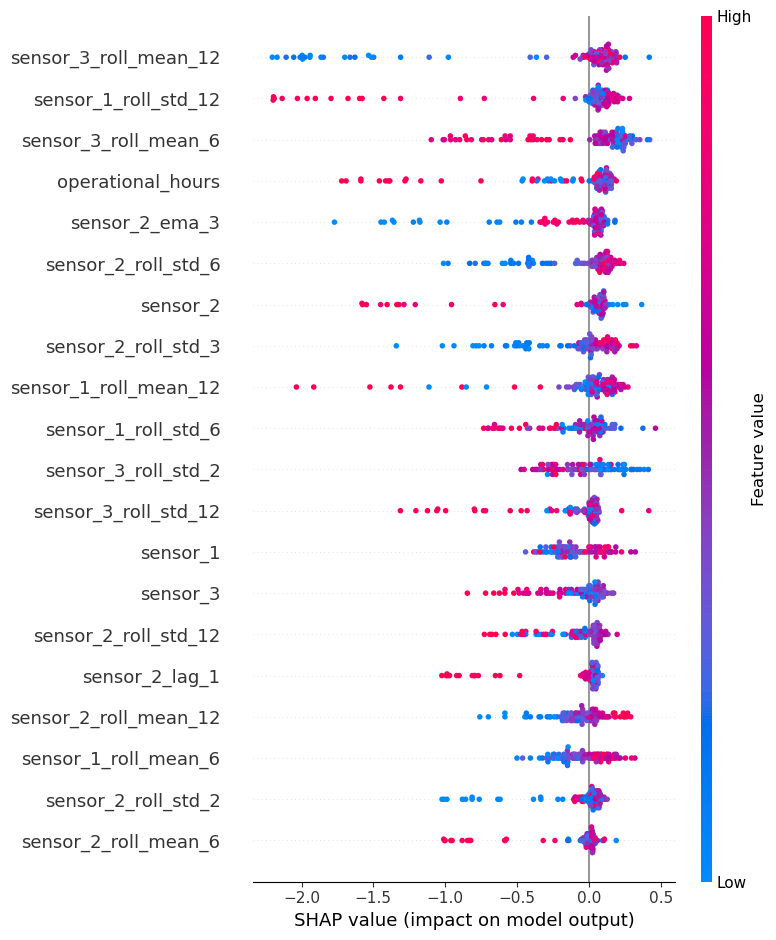

In [28]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(final_xgb)

# Take a small sample for speed
X_shap = X_test_scaled[:100]

shap_values = explainer.shap_values(X_shap)

# Global summary plot
shap.summary_plot(
    shap_values,
    X_shap,
    feature_names=feature_cols
)


In [29]:
import joblib

# Save the trained model
joblib.dump(final_xgb, "factoryguard_xgb_model.pkl")

# Save the scaler (needed to transform new data before prediction)
joblib.dump(scaler, "factoryguard_scaler.pkl")

print("Model and scaler saved successfully!")



Model and scaler saved successfully!
